# Laboratorium 08
## Rozwiązywanie równań nieliniowych
Iga Antonik, Helena Szczepanowska

# Zadanie 1
![alt text](img/zad1.png)

## Rozwiązanie
### Biblioteki

In [1]:
from scipy.optimize import newton
import warnings
warnings.filterwarnings('ignore')

### Definicje funkcji i punktów początkowych

In [2]:
def f_a(x):
    return x ** 3 - 5 * x

def f_b(x):
    return x ** 3 - 3 * x + 1

def f_c(x):
    return 2 - x ** 5

def f_d(x):
    return x ** 4 - 4.29 * x ** 2 - 5.29

### Wyniki metody Newtona dla zadanych punktów początkowych

In [3]:
x0_a = 1
x0_b = 1
x0_c = 0.01
x0_d = 0.8

result_a = newton(f_a, x0_a)
result_b = newton(f_b, x0_b)
result_c = newton(f_c, x0_c)
result_d = newton(f_d, x0_d)

print("Rozwiązanie dla funkcji a:", round(result_a, 2))
print("Rozwiązanie dla funkcji b:", round(result_b, 2))
print("Rozwiązanie dla funkcji c:", round(result_c, 2))
print("Rozwiązanie dla funkcji d:", round(result_d, 2))

Rozwiązanie dla funkcji a: 0.0
Rozwiązanie dla funkcji b: 1.0
Rozwiązanie dla funkcji c: 0.01
Rozwiązanie dla funkcji d: -0.79


### Badanie poprawności metody przy zadanych punktach początkowych

a. Dla funkcji f_a metoda Newtona poprawnie wskazała pierwiastek, ponieważ wynikowa wartość jest w przybliżeniu równa 0. W celu znalezienia innych pierwiastków można podstawić x_0 = 2 </br>

Dla pozostałych funkcji metoda Newtona nie działa: </br>

b. Dla funkcji f_b x_0 = 1 jest ekstremum lokalnym co powoduje błedne oszacowanie, ponieważ pochodna w punkcie 1 jest równa 0. Bardziej odpowiednim byłoby np. x_0 = 1.5 </br>

c. Dla funkcji f_c wartość x_0 = 0.01 jest zbyt blisko 0, przez co wartość przybliżana zbiega zbyt wolno do prawdziwego pierwiastka, lepszym wyborem będzie tutaj x_0 = 1.1 </br>

d. Dla funkcji f_d punkt początkowy musi być bliżej oczekiwanego pierwiastka, czyli np. x_0 = 2 </br>


### Wyniki metody Newtona dla poprawnie wyznaczonych punktów początkowych

In [4]:
x0_a = 2
x0_b = 1.5
x0_c = 1.1
x0_d = 2

result_a = newton(f_a, x0_a)
result_b = newton(f_b, x0_b)
result_c = newton(f_c, x0_c)
result_d = newton(f_d, x0_d)

print("Rozwiązanie dla funkcji a:", round(result_a, 2))
print("Rozwiązanie dla funkcji b:", round(result_b, 2))
print("Rozwiązanie dla funkcji c:", round(result_c, 2))
print("Rozwiązanie dla funkcji d:", round(result_d, 2))

Rozwiązanie dla funkcji a: 2.24
Rozwiązanie dla funkcji b: 1.53
Rozwiązanie dla funkcji c: 1.15
Rozwiązanie dla funkcji d: 2.3


## Wnioski
Poprawne wyznaczenie pierwiastków metodą Newtona jest możliwe, gdy odpowiednio wyznaczymy punkty początkowe zważając na charakterystykę funkcji.

# Zadanie 2

![alt text](img/zad2.png)

### Biblioteki

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative 

### Definicje funkcji

In [6]:
def f(x):
    return x ** 2 - 3 * x + 2

def g1(x):
    return (x ** 2 + 2) / 3

def g2(x):

    return np.sqrt(3 * x - 2) if 3 * x - 2 >= 0 else None

def g3(x):
    return 3 - 2 / x if x != 0 else None

def g4(x):
    return (x ** 2 - 2) / (2 * x - 3) if 2 * x - 3 != 0 else None


### Obliczenie pochodnych funkcji g w punkcie x_0 = 2 w celu określenia zbieżności funkcji

In [7]:
x_0 = 2
prime_value = [derivative(g1, x_0), derivative(g2, x_0), derivative(g3, x_0), derivative(g4, x_0)]
print(np.round(prime_value, 2))

[1.33 0.82 0.67 0.67]


### Obliczenie błędów bezwględnych wyznaczania wartości pierwiastka schematem iteracyjnym

In [8]:
def iterate(g, initial_value, true_value, n):
    x = initial_value
    errors = []
    for i in range(10):
        x = g(x)
        errors.append(abs(x - true_value)/true_value)
    
    return errors

initial_value = 1.6
true_value = 2
n = 10

errors_g1 = iterate(g1, initial_value, true_value, n)
errors_g2 = iterate(g2, initial_value, true_value, n)
errors_g3 = iterate(g3, initial_value, true_value, n)
errors_g4= iterate(g4, initial_value, true_value, n)

### Obliczenie rzędu zbieżności

In [9]:
def convergence_rate(errors):
    rates = []
    for k in range(1, len(errors) - 1):
        if errors[k-1] != 0 and errors[k] != 0 and errors[k+1] != 0:
            r = np.log(errors[k] / errors[k+1]) / np.log(errors[k-1] / errors[k])
            rates.append(r)
    return rates

rates_g1 = convergence_rate(errors_g1)
rates_g2 = convergence_rate(errors_g2)
rates_g3 = convergence_rate(errors_g3)
rates_g4 = convergence_rate(errors_g4)

average_rate_g1 = np.mean(rates_g1)
average_rate_g2 = np.mean(rates_g2)
average_rate_g3 = np.mean(rates_g3)
average_rate_g4 = np.mean(rates_g4)


print("Wartość rzędu zbieżności dla g1(x):", round(rates_g1[-1], 2))
print("Wartość rzędu zbieżności dla g2(x):", round(rates_g2[-1], 2))
print("Wartość rzędu zbieżności dla g3(x):", round(rates_g3[-1], 2))
print("Wartość rzędu zbieżności dla g4(x):", round(rates_g4[-1], 2))

Wartość rzędu zbieżności dla g1(x): 0.7
Wartość rzędu zbieżności dla g2(x): 1.01
Wartość rzędu zbieżności dla g3(x): 1.0
Wartość rzędu zbieżności dla g4(x): 2.0


## Wykres błedu względnego w zależności od liczby iteracji

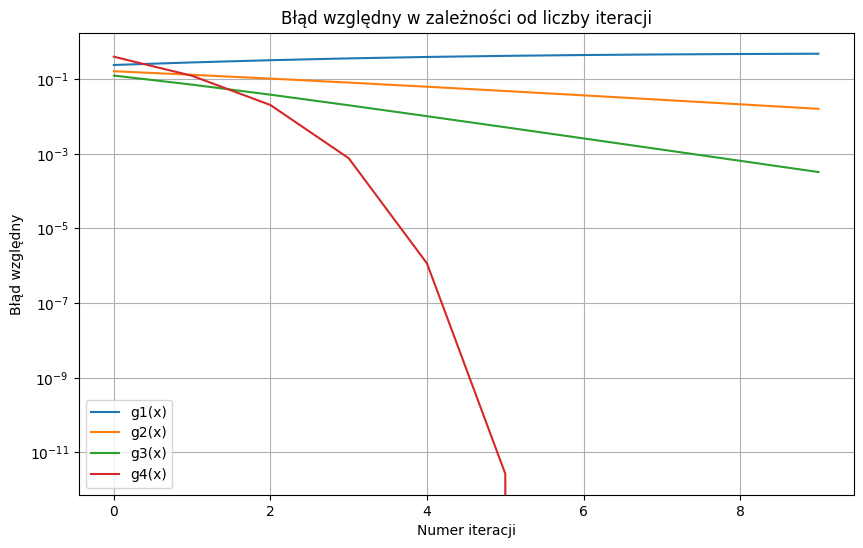

In [10]:
iterations = np.array(range(0,n))
plt.figure(figsize=(10, 6))
plt.plot(iterations, errors_g1, label='g1(x)')
plt.plot(iterations, errors_g2, label='g2(x)')
plt.plot(iterations, errors_g3, label='g3(x)')
plt.plot(iterations, errors_g4, label='g4(x)')
plt.title('Błąd względny w zależności od liczby iteracji')
plt.xlabel('Numer iteracji')
plt.ylabel('Błąd względny')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

## Wykres błedu względnego w zależności od liczby iteracji dla metod zbieżnych

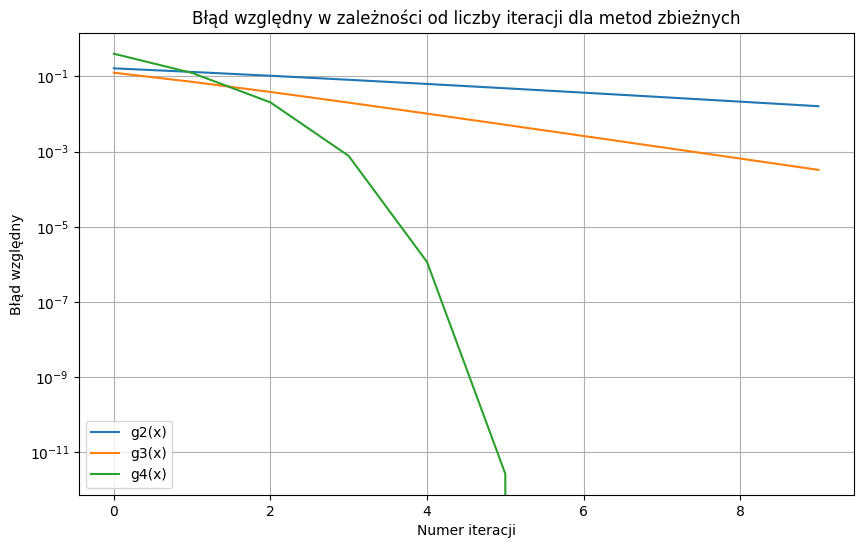

In [11]:
iterations = np.array(range(0,n))
plt.figure(figsize=(10, 6))
if prime_value[0] < 1:
    plt.plot(iterations, errors_g1, label='g1(x)')
if prime_value[1] < 1:
    plt.plot(iterations, errors_g2, label='g2(x)')
if prime_value[2] < 1:
    plt.plot(iterations, errors_g3, label='g3(x)')
if prime_value[3] < 1:
    plt.plot(iterations, errors_g4, label='g4(x)')
    
plt.title('Błąd względny w zależności od liczby iteracji dla metod zbieżnych')
plt.xlabel('Numer iteracji')
plt.ylabel('Błąd względny')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

## Wnioski
Implementacja schematów iteracyjnych potwierdziła wyniki analizy teoretycznej. Schematy g2, g3 i g4 wykazały zbieżność w ciągu 10 iteracji, podczas gdy g1 nie zbiegał się. Można zauważyć to zarówno na wykresie, jak i obserwując rząd zbieżności. Rząd zbieżności dla schematów zbieżnych g2, g3 wynosił ponad 1, z czego wynika, że zbiegają się one liniowo. Dla g3 w przybiliżeniu wynosi on 2, co oznacza, że zbiega się jeszcze szybciej, bo kwadratowo.

# Zadanie 3
![alt text](img/zad3.png)

### Definicje funkcji

In [12]:
def f_a(x):
    return x ** 3 - 2 * x - 5

def f_b(x):
    return np.exp(-x) - x

def f_c(x):
    return x * np.sin(x) - 1

def f_a_prim(x):
    return 3 * x ** 2 - 2

def f_b_prim(x):
    return -np.exp(-x) - 1

def f_c_prim(x):
    return np.sin(x) + x * np.cos(x)


### Funkcja implementująca schemat iteracji według metody Newtona

In [13]:
def newton_iteration(f, f_prim, x0, tolerance, max_iteration=10):
    x = x0
    iterations = 0
    while iterations < max_iteration:
        x_next = x - f(x) / f_prim(x)
        iterations += 1
        if abs(x_next - x) < tolerance:
            break
        x = x_next
    return x_next, iterations


### Wyliczenie pierwiastków przy toleracji 24-bitowej i 53-bitowej 


In [14]:
tolerance_24_bit = 1 / 2 ** 24
tolerance_53_bit = 1 / 2 ** 53

x0 = 1.5
x0_a = 2.0945
x0_b = 0.5671
x0_c = 1.1141

result_a_24_bit, iterations_a_24_bit = newton_iteration(f_a, f_a_prim, x0_a, tolerance_24_bit)
result_b_24_bit, iterations_b_24_bit = newton_iteration(f_b, f_b_prim, x0_b, tolerance_24_bit)
result_c_24_bit, iterations_c_24_bit = newton_iteration(f_c, f_c_prim, x0_c, tolerance_24_bit)

result_a_53_bit, iterations_a_53_bit = newton_iteration(f_a, f_a_prim, x0_a, tolerance_53_bit)
result_b_53_bit, iterations_b_53_bit = newton_iteration(f_b, f_b_prim, x0_b, tolerance_53_bit)
result_c_53_bit, iterations_c_53_bit = newton_iteration(f_c, f_c_prim, x0_c, tolerance_53_bit)

print("24-bitowa dokładność:")
print("Dla równania (a): Liczba iteracji =", iterations_a_24_bit)
print("Dla równania (b): Liczba iteracji =", iterations_b_24_bit)
print("Dla równania (c): Liczba iteracji =", iterations_c_24_bit)

print("\n53-bitowa dokładność:")
print("Dla równania (a): Liczba iteracji =", iterations_a_53_bit)
print("Dla równania (b): Liczba iteracji =", iterations_b_53_bit)
print("Dla równania (c): Liczba iteracji =", iterations_c_53_bit)


24-bitowa dokładność:
Dla równania (a): Liczba iteracji = 2
Dla równania (b): Liczba iteracji = 2
Dla równania (c): Liczba iteracji = 2

53-bitowa dokładność:
Dla równania (a): Liczba iteracji = 3
Dla równania (b): Liczba iteracji = 3
Dla równania (c): Liczba iteracji = 10


## Wnioski
Z obserwacji wynika, że im większa jest wymagana dokładność tym więcej jest potrzebnych iteracji. Z liczby o 4-bitowej dokładności dzięki schematom iteracyjnym możemy uzyskać dokładność 24-bitową po 3 iteracjach (8, 16, 32), a 53-bitową po 4 iteracjach (8, 16, 32, 64).

# Zadanie 4

![alt text](img/zad4.png)

### Definicje funkcji

In [15]:
def f_1(x_1,x_2):
    return x_1 ** 2 + x_2 ** 2 - 1

def f_2(x_1,x_2):
    return x_1 ** 2 - x_2

### Implementacja schematu iteracji metody Newtona

In [16]:
def jacobian(x_1, x_2):
    return np.array([[2 * x_1, 2 * x_2], [2 * x_1, -1]])

def newton_system(f1, f2, jacobian, x0, exact_solution_1, exact_solution_2, tolerance=1e-15, max_iterations=20):
    x = np.array(x0, dtype=float)
    errors = []

    for i in range(max_iterations):
        f = np.array([f1(x[0], x[1]), f2(x[0], x[1])])
        J = jacobian(x[0], x[1])
        delta_x = np.linalg.solve(J, -f)
        x += delta_x
        error = np.sqrt((x[0]- exact_solution_1)**2 + (x[1] - exact_solution_2)**2)
        errors.append(error)
        if error < tolerance:
            return x, i, errors

### Wyliczenie wartości i błędów względnych rozwiązań metodą Newtona

In [17]:
exact_solution_1 = np.sqrt(np.sqrt(5)/2 - 0.5)
exact_solution_2 = np.sqrt(5)/2 - 0.5
exact_value_norm = np.sqrt(exact_solution_1**2 + exact_solution_2**2)

x0 = [1, 1]
solution, iterations, errors = newton_system(f_1, f_2, jacobian, x0, exact_solution_1, exact_solution_2)

relative_error_1 = abs(solution[0] - exact_solution_1) / abs(exact_solution_1)
relative_error_2 = abs(solution[1] - exact_solution_2) / abs(exact_solution_2)

print("Rozwiązanie:", np.round(solution, 2))
print("Liczba iteracji:", iterations)
print("Błąd względny x1:", relative_error_1)
print("Błąd względny x2:", relative_error_2)

Rozwiązanie: [0.79 0.62]
Liczba iteracji: 4
Błąd względny x1: 0.0
Błąd względny x2: 1.7963785889362146e-16


## Wykres przedstawiający bład względny w zależności od numeru iteracji

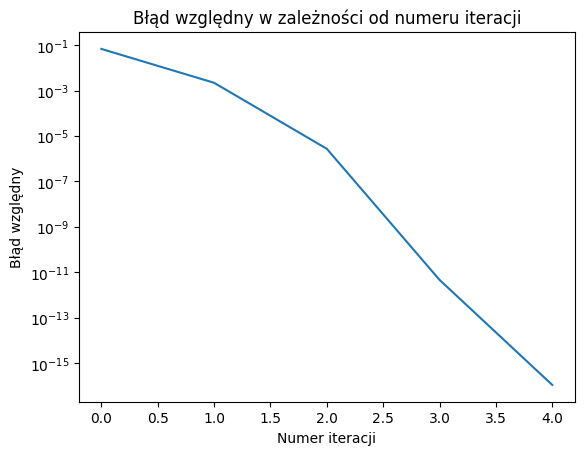

In [18]:
n_range = np.array(range(0, iterations+1))
plt.plot(n_range, errors/exact_value_norm)
plt.yscale('log')
plt.xlabel('Numer iteracji')
plt.ylabel('Błąd względny')
plt.title('Błąd względny w zależności od numeru iteracji')
plt.show()

## Wnioski końcowe
Metoda Newtona w ogólności jest skuteczna, ale jej prawidłowe działanie zależy od wyboru punktu początkowego oraz właściwości funkcji w pobliżu tego punktu. W przypadkach problematycznych warto rozważyć modyfikacje punktu początkowego lub zastosowanie alternatywnych metod numerycznych.
Analiza wartości pochodnych w punktach docelowych pozwala na ocenę zbieżności schematów iteracyjnych, co potwierdziło iteracyjne badanie rzędu zbieżności. Dodatkowo im więcej iteracji wykonamy tym mniejszy jest błąd względny.

## Bibliografia

Prezentacja z wykładu nr 6 - "Równania nielinowe" </br>

Prezentacja "Solving nonlinear equations" - Marcin Kuta </br>

https://pl.wikipedia.org/wiki/Metoda_Newtona </br>